In [17]:
import numpy as np
import pandas as pd

In [19]:
pip install plotly

  Using cached plotly-4.14.1-py2.py3-none-any.whl (13.2 MB)
Processing c:\users\egeze\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56\retrying-1.3.3-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [20]:
import seaborn as sns
import random
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [21]:
# For my homework, I'll be using the Human Development Index dataset by UNDP.

df = pd.read_excel(r"C:\Users\egeze\OneDrive\Masaüstü\Professional\Data_Science\DSPG\Homework/2020_Statistical_Annex_Table_1.xlsx")

In [6]:
df.head(10)

,Unnamed: 0,Table 1. Human Development Index and its components,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,SDG3,NaN,SDG4.3,NaN,SDG4.4,NaN,SDG8.5,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Human Development Index (HDI),NaN,Life expectancy at birth,NaN,Expected years of schooling,NaN,Mean years of schooling,NaN,Gross national income (GNI) per capita,NaN,GNI per capita rank minus HDI rank,NaN,HDI rank
4,HDI rank,Country,Value,NaN,(years),NaN,(years),NaN,(years),NaN,(2017 PPP $),NaN,NaN,NaN,NaN
5,NaN,NaN,2019,NaN,2019,NaN,2019,a,2019,a,2019,NaN,2019,NaN,2018
6,NaN,VERY HIGH HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,Norway,0.957,NaN,82.4,NaN,18.0662,b,12.8978,NaN,66494.3,NaN,7,NaN,1
8,2,Ireland,0.955,NaN,82.31,NaN,18.7053,b,12.6663,NaN,68370.6,NaN,4,NaN,3
9,2,Switzerland,0.955,NaN,83.78,NaN,16.3284,NaN,13.3808,NaN,69393.5,NaN,3,NaN,2


In [22]:
df.tail(5)

,Unnamed: 0,Table 1. Human Development Index and its components,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
191,185,Burundi,0.433,NaN,61.58,NaN,11.0693,NaN,3.28798,p,753.909,NaN,4,NaN,184
192,185,South Sudan,0.433,NaN,57.85,NaN,5.29626,n,4.8,n,2003.32,u,-10,NaN,186
193,187,Chad,0.398,NaN,54.24,NaN,7.34935,NaN,2.52368,p,1555.37,NaN,-5,NaN,187
194,188,Central African Republic,0.397,NaN,53.28,NaN,7.56836,j,4.282,f,993.009,NaN,0,NaN,188
195,189,Niger,0.394,NaN,62.42,NaN,6.47145,NaN,2.07905,j,1200.9,NaN,-4,NaN,189


I will drop the first three rows and some unnecessary columns to make my dataset appear a little more organized.

In [23]:
df.drop(index=[0, 1, 2, 3, 4, 5, 6], inplace=True)

In [24]:
df.drop(columns = ["Unnamed: 3", "Unnamed: 5", "Unnamed: 7", "Unnamed: 9", "Unnamed: 11", "Unnamed: 13"], inplace=True)

In [26]:
df.head(10)

,Unnamed: 0,Table 1. Human Development Index and its components,Unnamed: 2,Unnamed: 4,Unnamed: 6,Unnamed: 8,Unnamed: 10,Unnamed: 12,Unnamed: 14
7,1,Norway,0.957,82.4,18.0662,12.8978,66494.3,7,1
8,2,Ireland,0.955,82.31,18.7053,12.6663,68370.6,4,3
9,2,Switzerland,0.955,83.78,16.3284,13.3808,69393.5,3,2
10,4,"Hong Kong, China (SAR)",0.949,84.86,16.9295,12.28,62984.8,7,4
11,4,Iceland,0.949,82.99,19.0831,12.7728,54682.4,14,4
12,6,Germany,0.947,81.33,16.9772,14.1517,55314.4,11,4
13,7,Sweden,0.945,82.8,19.4823,12.5485,54507.8,12,7
14,8,Australia,0.944,83.44,21.9543,12.7247,48084.8,15,7
15,8,Netherlands,0.944,82.28,18.4851,12.4148,57707.1,6,9
16,10,Denmark,0.94,80.9,18.8934,12.6138,58661.9,2,10


One problem in my data set is that columns are badly named. Perhaps I can re-name them?

In [27]:
df.columns = ["Rank19", "Country", "HDI", "LifeExp", "SchExp", "SchMean", "GNIpercap", "GNI-HDIrank", "Rank18"]

In [28]:
df.head(5)

,Rank19,Country,HDI,LifeExp,SchExp,SchMean,GNIpercap,GNI-HDIrank,Rank18
7,1,Norway,0.957,82.4,18.0662,12.8978,66494.3,7,1
8,2,Ireland,0.955,82.31,18.7053,12.6663,68370.6,4,3
9,2,Switzerland,0.955,83.78,16.3284,13.3808,69393.5,3,2
10,4,"Hong Kong, China (SAR)",0.949,84.86,16.9295,12.28,62984.8,7,4
11,4,Iceland,0.949,82.99,19.0831,12.7728,54682.4,14,4


I will put labels so that it's easier to find countries' HDI information with loc.

In [29]:
df = df.set_index("Country")

In [30]:
df.head(15)

,Rank19,HDI,LifeExp,SchExp,SchMean,GNIpercap,GNI-HDIrank,Rank18
Country,,,,,,,,
Norway,1,0.957,82.4,18.0662,12.8978,66494.3,7,1
Ireland,2,0.955,82.31,18.7053,12.6663,68370.6,4,3
Switzerland,2,0.955,83.78,16.3284,13.3808,69393.5,3,2
"Hong Kong, China (SAR)",4,0.949,84.86,16.9295,12.28,62984.8,7,4
Iceland,4,0.949,82.99,19.0831,12.7728,54682.4,14,4
Germany,6,0.947,81.33,16.9772,14.1517,55314.4,11,4
Sweden,7,0.945,82.8,19.4823,12.5485,54507.8,12,7
Australia,8,0.944,83.44,21.9543,12.7247,48084.8,15,7
Netherlands,8,0.944,82.28,18.4851,12.4148,57707.1,6,9


In [31]:
# Now everything looks better. It seems like countries are sorted according to their HDI scores.
# Let's examine our data set further.

df.shape

(189, 8)

Seems like it has 189 rows, thus, 189 different country observations. All countries have 8 indications on HDI, thus, there are 8 columns.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, Norway to Niger
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank19       189 non-null    object
 1   HDI          189 non-null    object
 2   LifeExp      189 non-null    object
 3   SchExp       189 non-null    object
 4   SchMean      189 non-null    object
 5   GNIpercap    189 non-null    object
 6   GNI-HDIrank  189 non-null    object
 7   Rank18       189 non-null    object
dtypes: object(8)
memory usage: 13.3+ KB


In [33]:
# Let's suppose I want to look at how Turkey fares in terms of its HDI score.

df.loc["Turkey"]

Rank19              54
HDI               0.82
LifeExp          77.69
SchExp         16.6027
SchMean        8.10682
GNIpercap      27700.9
GNI-HDIrank         -4
Rank18              54
Name: Turkey, dtype: object

In [34]:
# I am interested mainly in schooling. 
# Let's see how Turkey fares in expected years of schooling.

df.loc["Turkey"]["SchExp"]

16.60266555

In [35]:
# I want to know the countries with HDI score higher than 0.85 AND with an expected schooling of more than 15 years.

filt = (df["HDI"] > 0.85) & (df["SchExp"] > 15)

In [30]:
df[filt]

,Rank19,HDI,LifeExp,SchExp,SchMean,GNIpercap,GNI-HDIrank,Rank18
Country,,,,,,,,
Norway,1,0.957,82.4,18.0662,12.8978,66494.3,7,1
Ireland,2,0.955,82.31,18.7053,12.6663,68370.6,4,3
Switzerland,2,0.955,83.78,16.3284,13.3808,69393.5,3,2
"Hong Kong, China (SAR)",4,0.949,84.86,16.9295,12.28,62984.8,7,4
Iceland,4,0.949,82.99,19.0831,12.7728,54682.4,14,4
Germany,6,0.947,81.33,16.9772,14.1517,55314.4,11,4
Sweden,7,0.945,82.8,19.4823,12.5485,54507.8,12,7
Australia,8,0.944,83.44,21.9543,12.7247,48084.8,15,7
Netherlands,8,0.944,82.28,18.4851,12.4148,57707.1,6,9


In [36]:
# I want to see countries sorted, beginning with the lowest schooling mean.

df.sort_values(by = "SchMean", ascending = True)

,Rank19,HDI,LifeExp,SchExp,SchMean,GNIpercap,GNI-HDIrank,Rank18
Country,,,,,,,,
Burkina Faso,182,0.452,61.58,9.27373,1.6443,2132.96,-9,183
Niger,189,0.394,62.42,6.47145,2.07905,1200.9,-4,189
Mali,184,0.434,59.31,7.46103,2.35295,2268.77,-17,184
Chad,187,0.398,54.24,7.34935,2.52368,1555.37,-5,187
Guinea,178,0.477,61.6,9.4085,2.77422,2405.18,-12,177
...,...,...,...,...,...,...,...,...
United Kingdom,13,0.932,81.32,17.4984,13.2429,46070.6,13,14
Canada,16,0.929,82.43,16.1579,13.3661,48527,5,14
Switzerland,2,0.955,83.78,16.3284,13.3808,69393.5,3,2


In [37]:
# Now with the highest schooling mean.

df.sort_values(by = "SchMean", ascending = False)

,Rank19,HDI,LifeExp,SchExp,SchMean,GNIpercap,GNI-HDIrank,Rank18
Country,,,,,,,,
Germany,6,0.947,81.33,16.9772,14.1517,55314.4,11,4
United States,17,0.926,78.86,16.3104,13.4134,63825.7,-7,17
Switzerland,2,0.955,83.78,16.3284,13.3808,69393.5,3,2
Canada,16,0.929,82.43,16.1579,13.3661,48527,5,14
United Kingdom,13,0.932,81.32,17.4984,13.2429,46070.6,13,14
...,...,...,...,...,...,...,...,...
Guinea,178,0.477,61.6,9.4085,2.77422,2405.18,-12,177
Chad,187,0.398,54.24,7.34935,2.52368,1555.37,-5,187
Mali,184,0.434,59.31,7.46103,2.35295,2268.77,-17,184


In [38]:
# Let's see the median value of schooling expectation for all countries.
# But first, we have to make sure that the data points in the column is stored as numeric values.
# Otherwise, it won't compute the median.

type(df["SchExp"]["Turkey"])

float

In [39]:
# It seems like the data points in the series are float.
# Let's compute the median of all expected schooling years for 189 countries.

df["SchExp"].median()

13.188028

In [40]:
# Let's see the mean value of schooling expectation for all countries.

df["SchExp"].mean()

13.325134590185186

In [41]:
# Now let's find out how many countries are BELOW the mean.

filt2 = (df["SchExp"] < df["SchExp"].mean())

In [42]:
# Seems like 96 countries have an expected schooling of less than 13.325 years.

df[filt2].count()

Rank19         96
HDI            96
LifeExp        96
SchExp         96
SchMean        96
GNIpercap      96
GNI-HDIrank    96
Rank18         96
dtype: int64

I'd like to visually see the correlation between GNI per capita and mean years of schooling; but only for the top 10 HDI countries.

In [43]:
df2 = df[0:10:1]

In [44]:
df2

,Rank19,HDI,LifeExp,SchExp,SchMean,GNIpercap,GNI-HDIrank,Rank18
Country,,,,,,,,
Norway,1,0.957,82.4,18.0662,12.8978,66494.3,7,1
Ireland,2,0.955,82.31,18.7053,12.6663,68370.6,4,3
Switzerland,2,0.955,83.78,16.3284,13.3808,69393.5,3,2
"Hong Kong, China (SAR)",4,0.949,84.86,16.9295,12.28,62984.8,7,4
Iceland,4,0.949,82.99,19.0831,12.7728,54682.4,14,4
Germany,6,0.947,81.33,16.9772,14.1517,55314.4,11,4
Sweden,7,0.945,82.8,19.4823,12.5485,54507.8,12,7
Australia,8,0.944,83.44,21.9543,12.7247,48084.8,15,7
Netherlands,8,0.944,82.28,18.4851,12.4148,57707.1,6,9


To have a proper graph, I have to sort the graph according to an ascending GNI per capita.

In [45]:
df2.sort_values(by="GNIpercap", inplace=True)

In [46]:
df2

,Rank19,HDI,LifeExp,SchExp,SchMean,GNIpercap,GNI-HDIrank,Rank18
Country,,,,,,,,
Australia,8,0.944,83.44,21.9543,12.7247,48084.8,15,7
Sweden,7,0.945,82.8,19.4823,12.5485,54507.8,12,7
Iceland,4,0.949,82.99,19.0831,12.7728,54682.4,14,4
Germany,6,0.947,81.33,16.9772,14.1517,55314.4,11,4
Netherlands,8,0.944,82.28,18.4851,12.4148,57707.1,6,9
Denmark,10,0.94,80.9,18.8934,12.6138,58661.9,2,10
"Hong Kong, China (SAR)",4,0.949,84.86,16.9295,12.28,62984.8,7,4
Norway,1,0.957,82.4,18.0662,12.8978,66494.3,7,1
Ireland,2,0.955,82.31,18.7053,12.6663,68370.6,4,3


In [47]:
meanschooling = [e for e in df2["SchMean"]]

In [48]:
meanschooling

[12.72469119,
 12.54847,
 12.77278684,
 14.15168,
 12.4148,
 12.61380326,
 12.27996,
 12.89775,
 12.6663305,
 13.38081241]

In [49]:
GNI_pc = [e for e in df2["GNIpercap"]]

In [50]:
GNI_pc

[48084.84207,
 54507.80504,
 54682.38057,
 55314.35355,
 57707.06867,
 58661.87084,
 62984.76553,
 66494.25217,
 68370.58737,
 69393.52076]

In [51]:
cs = [e for e in df2.index]

In [52]:
cs

['Australia',
 'Sweden',
 'Iceland',
 'Germany',
 'Netherlands',
 'Denmark',
 'Hong Kong, China (SAR)',
 'Norway',
 'Ireland',
 'Switzerland']

In [60]:
df.head(5)

,Rank19,HDI,LifeExp,SchExp,SchMean,GNIpercap,GNI-HDIrank,Rank18
Country,,,,,,,,
Norway,1,0.957,82.4,18.0662,12.8978,66494.3,7,1
Ireland,2,0.955,82.31,18.7053,12.6663,68370.6,4,3
Switzerland,2,0.955,83.78,16.3284,13.3808,69393.5,3,2
"Hong Kong, China (SAR)",4,0.949,84.86,16.9295,12.28,62984.8,7,4
Iceland,4,0.949,82.99,19.0831,12.7728,54682.4,14,4


In [62]:
# Let's see if there is correlation between increasing Gross National Income per capita and average schooling years...
# ... among the top 10 HDI score countries.
# Seems like there is not a correlation.

plt.style.use("default")

plt.plot(SchMean, LifeExp, color = "b", linestyle = "--", marker= ".")

plt.xlabel("Gross National Income Per Capita")
plt.ylabel("Mean of Schooling Years")
plt.title("GNI-Schooling Correlation")

plt.legend()

plt.show()

NameError: name 'SchMean' is not defined

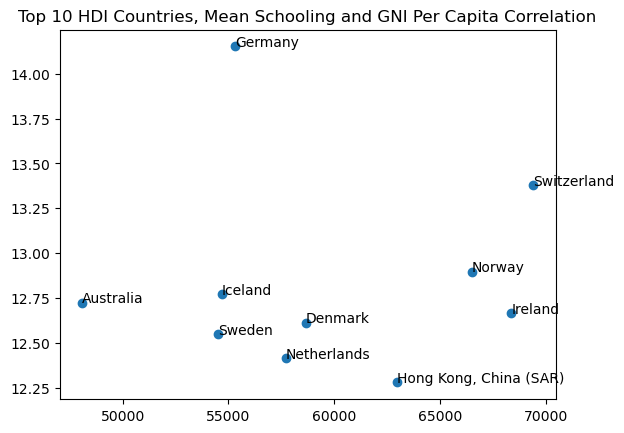

In [54]:
# Now let's see each country's specific GNI per capita and mean schooling in a scatterplot.

plt.style.use("default")

plt.title("Top 10 HDI Countries, Mean Schooling and GNI Per Capita Correlation")

plt.scatter(GNI_pc, meanschooling)

for i, txt in enumerate(cs):
    plt.annotate(txt, (GNI_pc[i], meanschooling[i]))
    
plt.show()

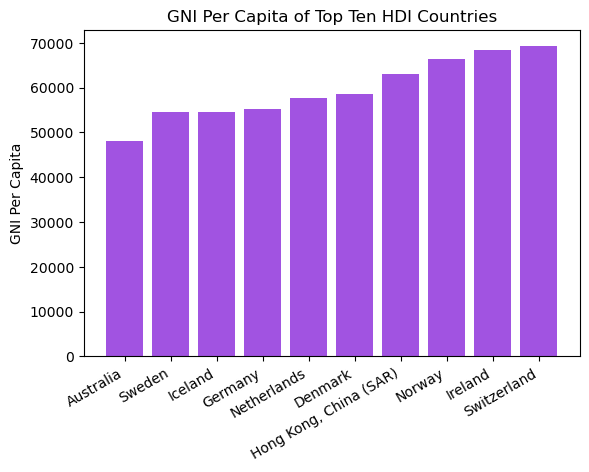

In [55]:
# We could also make use of a bar chart to see each country's GNI per capita. 

plt.style.use("default")

width = 0.25

fig, ax = plt.subplots()

plt.bar(cs, GNI_pc, color = "#A153E1", label = "GNI Per Capita of Top Ten HDI Countries")

plt.ylabel("GNI Per Capita")

plt.title("GNI Per Capita of Top Ten HDI Countries")

fig.autofmt_xdate()

plt.show() 